# Exploring Terms in the Encyclopaedia Britannica

## Knowledge Graphs for related Terms


In this notebook we are going to do general explorations with the dataframe that we have obtained either with the posprocess_eb.py script or Merging_EB_Terms.ipynb notebooks. Both methods obtain the same dataframe. 

We have selected the first Edition for this explorations, but we can run this notebook with any of the other editions.

**Remark**: Edition 1, has 3 volumes, and it was printed twice, in 1771 and 1773. 

These are the explorations that we are going to do:
- Create a new df selecting just the 1st volume of 1771. This is the df that we are going to use for the rest of this notebook. 
- Explode Related Terms column
- Create a Knowledge Graph
    - Using all the information
    - Using the first 50 terms 
    - Using one term: Abacus
    - Using the terms with most relations



### Loading the necessary libraries

In [1]:
import yaml
import matplotlib.pyplot as plt
import numpy as np
import collections
import matplotlib as mpl

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from yaml import safe_load
from pandas.io.json import json_normalize

### Functions

In [4]:
def create_graph_df(df, num=None):
    if num:
        graph_df = nx.from_pandas_edgelist(df.head(n=num), source='term', target='relatedTerms', edge_attr=True, create_using=nx.MultiDiGraph())
    
    else: 
        graph_df = nx.from_pandas_edgelist(df, source='term', target='relatedTerms', edge_attr=True, create_using=nx.MultiDiGraph())

    return graph_df
   

In [5]:
def explore_a_term(df, term):
    #term_df= df[df['term'].str.contains(term)]
    term_df = df[df["term"]==term]
    #G = create_graph_df(term_df, 50)
    G = create_graph_df(term_df)
    plt.figure(figsize=(5,5))
    pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
    plt.show()

## We have dataframe with these columns

- definition:           Definition of a term
- editionNum:           1,2,3,4,5,6,7,8
- editionTitle:         Title of the edition
- header:               Header of the page's term                                  
- place:                Place where the volume was edited (e.g. Edinburgh)                                    
- relatedTerms:         Related terms (see X article)  
- altoXML:              File Path of the XML file from which the term belongs       
- term:                 Term name                            
- positionPage:         Position of ther term in the page     
- startsAt:             Number page in which the term definition starts 
- endsAt:               Number page in which the term definition ends 
- volumeTitle:          Title of the Volume
- typeTerm:             Type of term [Topic| Articles]                                       
- year:                 Year of the edition
- volumeNum:            Volume number (e.g. 1)
- letters:              leters of the volume (A-B)
- part:                 Part of the volume (e.g 1)
- supplement:           Supplement's Title
- supplementsTo:        It suppelements to editions [1, 2, 3....]
- numberOfWords:        Number of words per term definition
- numberOfTerms:        Number of terms per page
- numberOfPages:        Number of pages per volume

### 1. Load dataframe from JSON file

In [6]:
df = pd.read_json('../../results_NLS/results_eb_1_edition_dataframe', orient="index") 

Now we are going to oder the columns of our dataframe and visualise it. 

In [7]:
df = df[["term", "definition", "relatedTerms", "header", "startsAt", "endsAt", "numberOfTerms","numberOfWords", "numberOfPages", \
             "positionPage", "typeTerm", "editionTitle", "editionNum", "supplementTitle", "supplementsTo",\
             "year", "place", "volumeTitle", "volumeNum", "letters", "part", "altoXML"]]
df

,term,definition,relatedTerms,header,startsAt,endsAt,numberOfTerms,numberOfWords,numberOfPages,positionPage,...,editionNum,supplementTitle,supplementsTo,year,place,volumeTitle,volumeNum,letters,part,altoXML
0,OR,"A NEW A D I C T I A A, the name of several riv...",[],EBAA,15,15,22,54,832,0,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
1,AABAM,"a term, among alchemifts, for lead,",[],EBAA,15,15,22,6,832,1,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
2,AACH,the name of a town and river in Swabia. It is ...,[],EBAA,15,15,22,17,832,2,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
3,AADE,"the name of two rivers, one in the country of ...",[],EBAA,15,15,22,19,832,3,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
4,AAHUS,a small town and diftrift in Weftphalia.,[],EBAA,15,15,22,7,832,4,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18112,ZAFFER,"01 Zafre, in chemistry, the name of a blue fuf...",[],YOAYUC,855,855,14,57,864,10,...,1,,[],1773,London,"Encyclopaedia Britannica: or, A dictionary of ...",3,M-Z,0,144850368/alto/188374994.34.xml
18113,ZAMORA,"antyof Spain in the province of Leon, fituater...",[],YOAYUC,855,855,14,31,864,11,...,1,,[],1773,London,"Encyclopaedia Britannica: or, A dictionary of ...",3,M-Z,0,144850368/alto/188374994.34.xml
18114,ZANGUEB,"AR a country on the east coast of Africa, situ...",[],YOAYUC,855,855,14,54,864,12,...,1,,[],1773,London,"Encyclopaedia Britannica: or, A dictionary of ...",3,M-Z,0,144850368/alto/188374994.34.xml
18115,ZANNICHELLIA,"in botany, a genus of the monoe ia monandria c...",[],YOAYUC,855,855,14,56,864,13,...,1,,[],1773,London,"Encyclopaedia Britannica: or, A dictionary of ...",3,M-Z,0,144850368/alto/188374994.34.xml


### 2. Related Terms

### 2.1 Selecting just the first volume 1771

In [8]:
df_1771_vol1 = df[(df['year'] == 1771) & (df['volumeNum'] == 1) ]


**Remember**: A term can appear in more than once  per eddition. 

In [9]:
df_1771_vol1

,term,definition,relatedTerms,header,startsAt,endsAt,numberOfTerms,numberOfWords,numberOfPages,positionPage,...,editionNum,supplementTitle,supplementsTo,year,place,volumeTitle,volumeNum,letters,part,altoXML
0,OR,"A NEW A D I C T I A A, the name of several riv...",[],EBAA,15,15,22,54,832,0,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
1,AABAM,"a term, among alchemifts, for lead,",[],EBAA,15,15,22,6,832,1,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
2,AACH,the name of a town and river in Swabia. It is ...,[],EBAA,15,15,22,17,832,2,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
3,AADE,"the name of two rivers, one in the country of ...",[],EBAA,15,15,22,19,832,3,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
4,AAHUS,a small town and diftrift in Weftphalia.,[],EBAA,15,15,22,7,832,4,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,BYSSUS,"in botany, a genus of moffes belonging to the ...",[],BUXBYZ,829,829,15,38,832,11,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2516,BYSSUS,"in antiquity, that fine Egyptian linen whereof...",[],BUXBYZ,829,829,15,77,832,12,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2517,BYZANT,See Bezant. ^,[BEZANT],BUXBYZ,829,829,15,3,832,13,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2518,BYZANTIUM,"the ancient mame of Constantinople,",[],BUXBYZ,829,829,15,5,832,14,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml


### 3. NOT DOING IT: Filtering the terms that have related terms

NOT DOING IT ANYMORE: We are interested to explore the relations between terms, so we are going to filter out all these terms wich do not have related terms

In [10]:
#df_related_1771_vol1=df_1771_vol1[df_1771_vol1['related_terms'].apply(lambda x: len(x)) > 0]

### NEW: 3. WITHOUT Filtering the terms that have related terms

We need to "explode" teh column "related_terms", so we have a row, per related term. 

So, lets imagine that we have the term "X" and its related terms are "Y" and "Z". Originally we would a row, in which the related_terms colum value would be ["X", "Y"]. 

After exploding the related_terms colum, now we are going to have two rows with exactly the same information, but in one row, we will have "Y" as the related term, and in another "Z". 

In [11]:
# Experimenting without filtering by related_terms

df_related_1771_vol1=df_1771_vol1.explode('relatedTerms')

Instead of filtering by related_terms, we are going to give the same term, to the related_terms column, if a related_term colum is NaN

In [12]:
df_related_1771_vol1['relatedTerms'] =df_related_1771_vol1['relatedTerms'].fillna(df_related_1771_vol1['term'])

In [13]:
df_related_1771_vol1

,term,definition,relatedTerms,header,startsAt,endsAt,numberOfTerms,numberOfWords,numberOfPages,positionPage,...,editionNum,supplementTitle,supplementsTo,year,place,volumeTitle,volumeNum,letters,part,altoXML
0,OR,"A NEW A D I C T I A A, the name of several riv...",OR,EBAA,15,15,22,54,832,0,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
1,AABAM,"a term, among alchemifts, for lead,",AABAM,EBAA,15,15,22,6,832,1,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
2,AACH,the name of a town and river in Swabia. It is ...,AACH,EBAA,15,15,22,17,832,2,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
3,AADE,"the name of two rivers, one in the country of ...",AADE,EBAA,15,15,22,19,832,3,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
4,AAHUS,a small town and diftrift in Weftphalia.,AAHUS,EBAA,15,15,22,7,832,4,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,BYSSUS,"in botany, a genus of moffes belonging to the ...",BYSSUS,BUXBYZ,829,829,15,38,832,11,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2516,BYSSUS,"in antiquity, that fine Egyptian linen whereof...",BYSSUS,BUXBYZ,829,829,15,77,832,12,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2517,BYZANT,See Bezant. ^,BEZANT,BUXBYZ,829,829,15,3,832,13,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml
2518,BYZANTIUM,"the ancient mame of Constantinople,",BYZANTIUM,BUXBYZ,829,829,15,5,832,14,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188093489.34.xml


### 4.Creating a Knowledge graph 


### 4.1  Using all the information available


In [14]:

graph_df = create_graph_df(df_related_1771_vol1)


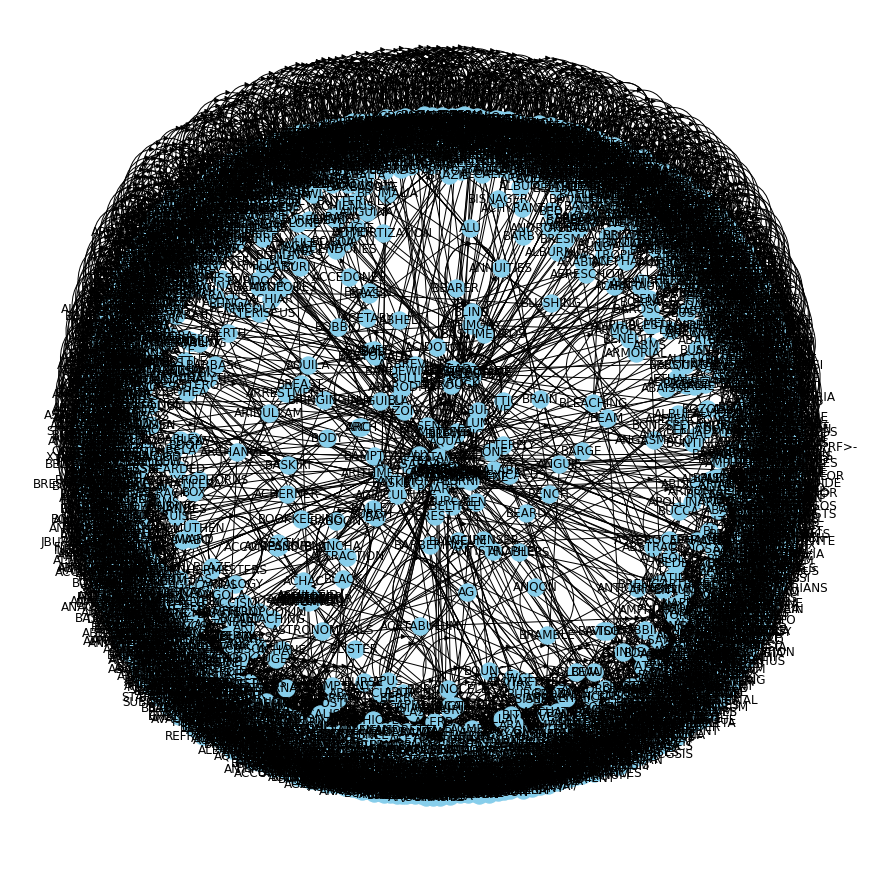

In [15]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(graph_df)
nx.draw(graph_df, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### 4.2 Just with the first 50 terms

In [16]:
graph_df = create_graph_df(df_related_1771_vol1, 50)

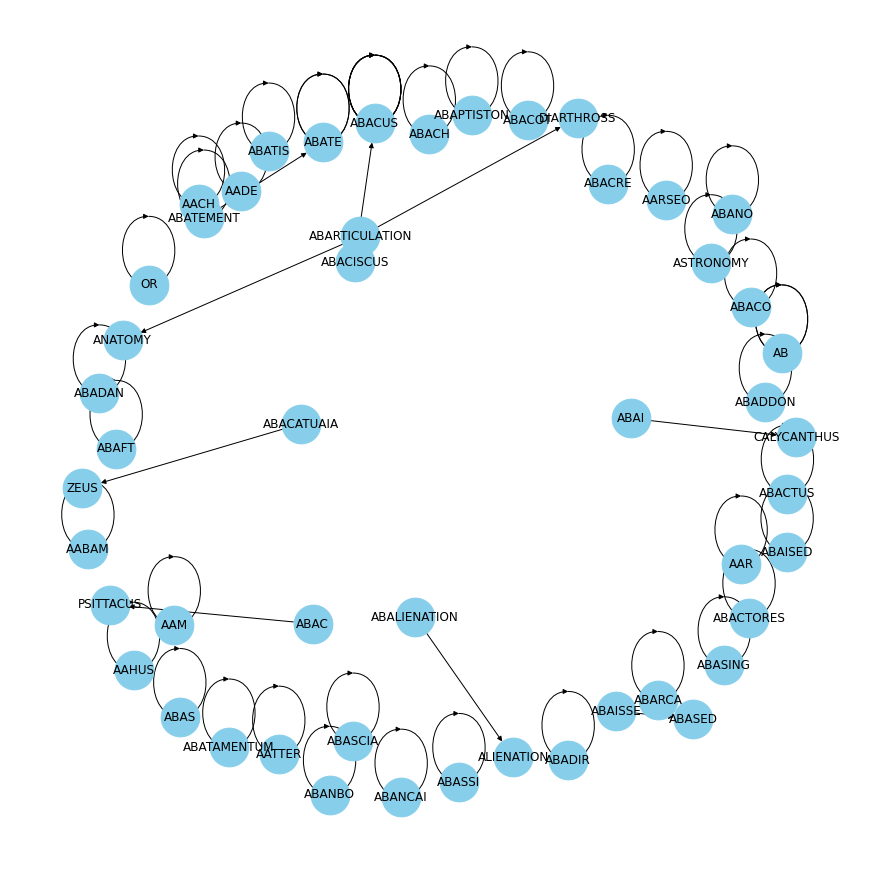

In [17]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(graph_df, k = 0.5) # k regulates the distance between nodes
nx.draw(graph_df, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

Here are the 50 terms stored in a list

In [18]:
#list_terms= df_related_1771_vol1[["term"]].head(n=50).values.tolist()
#list_terms_update=[]
#for i in list_terms:
#    list_terms_update.append(i[0])
#list_terms_update

### 4.3 Exploring the relations of one term - ABACISCUS

We are going to use the term ABACISCUS, and visualize its related terms in a graph. 

In [19]:
ABACISCUS_df= df_related_1771_vol1[df_related_1771_vol1['term'].str.contains("ABACISCUS")]
ABACISCUS_df

,term,definition,relatedTerms,header,startsAt,endsAt,numberOfTerms,numberOfWords,numberOfPages,positionPage,...,editionNum,supplementTitle,supplementsTo,year,place,volumeTitle,volumeNum,letters,part,altoXML
15,ABACISCUS,See ABACUS.,ABACUS,EBAA,15,15,22,2,832,15,...,1,,[],1771,Edinburgh,"Encyclopaedia Britannica; or, A dictionary of ...",1,A-B,0,144133901/alto/188082904.34.xml


In [20]:
G = create_graph_df(ABACISCUS_df)

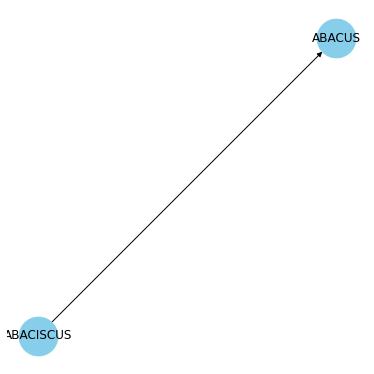

In [21]:
plt.figure(figsize=(5,5))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

### 4.4 Exploring the terms with most relations.

Now lets get the 10 terms with most relations. For that, we have to group the dataframe by terms, and create an extra colum, with the count. 

In [22]:
rt=df_related_1771_vol1.groupby(['term']).size().rename('count').reset_index().sort_values(['count'], ascending=False)
rt

,term,count
2051,BOTANY,86
1078,ARCHITECTURE,37
1148,ARITHMETICK,35
1278,ASTRONOMY,16
2138,BRANDY,16
...,...,...
869,ANTITHENAR,1
870,ANTITHESIS,1
871,ANTITHETARIUS,1
872,ANTITRAGUS,1


And now lets get the 10 most repeated terms

In [23]:
rt.nlargest(10, 'count')

,term,count
2051,BOTANY,86
1078,ARCHITECTURE,37
1148,ARITHMETICK,35
1278,ASTRONOMY,16
2138,BRANDY,16
1895,BLACK,13
1947,BOARD,12
562,ALUM,12
2316,BULBURWE,11
832,ANNUITIES,10


Lets select ASTRONOMY term

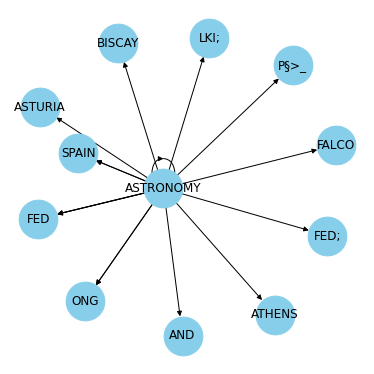

In [24]:
explore_a_term(df_related_1771_vol1, "ASTRONOMY")

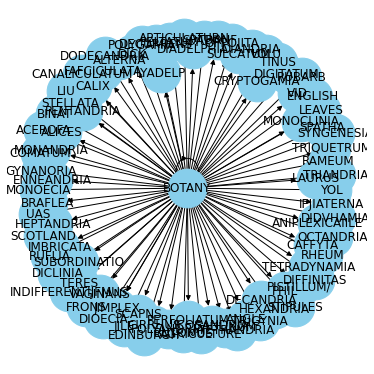

In [25]:
explore_a_term(df_related_1771_vol1, "BOTANY")

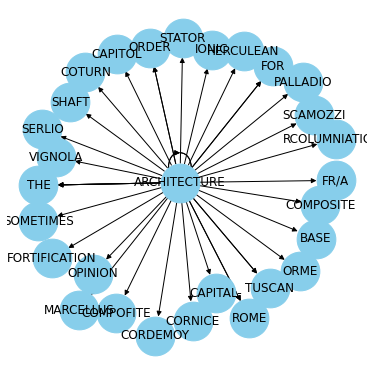

In [26]:
explore_a_term(df_related_1771_vol1, "ARCHITECTURE")

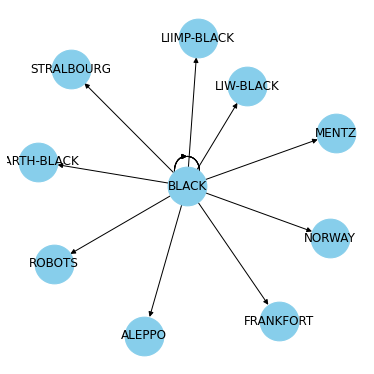

In [27]:
explore_a_term(df_related_1771_vol1, "BLACK")

In [28]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['term'] == "ALGEBRA"]
ALGEBRA_df["relatedTerms"]

498    ALGEBRA
499    ALGEBRA
Name: relatedTerms, dtype: object

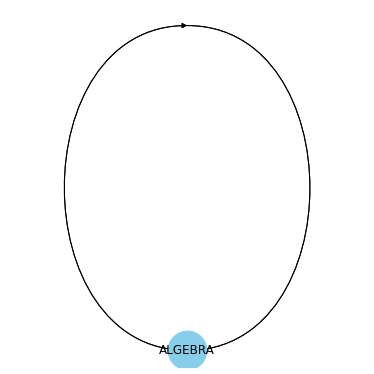

In [29]:
explore_a_term(df_related_1771_vol1, "ALGEBRA")

In [30]:
ALGEBRA_df= df_related_1771_vol1[df_related_1771_vol1['relatedTerms'] == "ALGEBRA"]

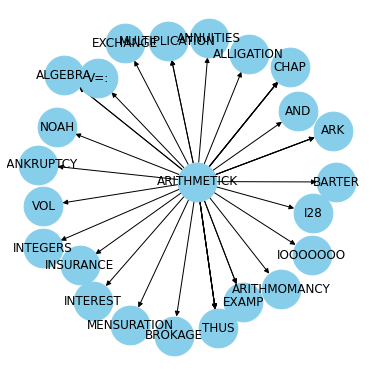

In [31]:
explore_a_term(df_related_1771_vol1, "ARITHMETICK")